# Assignment 3

In this assigment, we will work with the *Forest Fire* data set. Please download the data from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/162/forest+fires). Extract the data files into the subdirectory: `../data/fires/` (relative to `./src/`).

## Objective

+ The model objective is to predict the area affected by forest fires given the features set. 
+ The objective of this exercise is to assess your ability to construct and evaluate model pipelines.
+ Please note: the instructions are not meant to be 100% prescriptive, but instead they are a set of minimum requirements. If you find predictive performance gains by applying additional steps, by all means show them. 

## Variable Description

From the description file contained in the archive (`forestfires.names`), we obtain the following variable descriptions:

1. X - x-axis spatial coordinate within the Montesinho park map: 1 to 9
2. Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9
3. month - month of the year: "jan" to "dec" 
4. day - day of the week: "mon" to "sun"
5. FFMC - FFMC index from the FWI system: 18.7 to 96.20
6. DMC - DMC index from the FWI system: 1.1 to 291.3 
7. DC - DC index from the FWI system: 7.9 to 860.6 
8. ISI - ISI index from the FWI system: 0.0 to 56.10
9. temp - temperature in Celsius degrees: 2.2 to 33.30
10. RH - relative humidity in %: 15.0 to 100
11. wind - wind speed in km/h: 0.40 to 9.40 
12. rain - outside rain in mm/m2 : 0.0 to 6.4 
13. area - the burned area of the forest (in ha): 0.00 to 1090.84 









### Specific Tasks

+ Construct four model pipelines, out of combinations of the following components:

    + Preprocessors:

        - A simple processor that only scales numeric variables and recodes categorical variables.
        - A transformation preprocessor that scales numeric variables and applies a non-linear transformation.
    
    + Regressor:

        - A baseline regressor, which could be a [K-nearest neighbours model](https://open.spotify.com/track/4R3AU2pjv8ge2siX1fVbZs?si=b2712f32da0e4358) or a simple [linear regression model](https://scikit-learn.org/stable/modules/linear_model.html)
        - An advanced regressor of your choice (e.g., Random Forest, Neural Network, etc.)

+ Evaluate tune and evaluate each of the four model pipelines. 

    - Select a [performance metric](https://scikit-learn.org/stable/modules/linear_model.html) out of the following options: explained variance, max error, root mean squared error (RMSE), mean absolute error (MAE), r-squared.
    - *TIPS*: 
    
        * Out of the suggested metrics above, [some are correlation metrics, but this is a prediction problem](https://www.tmwr.org/performance#performance). Choose wisely (and don't choose the incorrect options.) 

+ Select the best-performing model and explain its predictions.

    - Provide local explanations.
    - Obtain global explanations and recommend a variable selection strategy.

+ Export your model as a pickle file.


You can work on the Jupyter notebook, as this experiment is fairly short (no need to use sacred). 

# Load the data

Assuming that the files `adult.data` and `adult.test` are in `../data/adult/`, then you can use the code below to load them.

In [254]:
import pandas as pd
import numpy as np
columns = [
    'coord_x', 'coord_y', 'month', 'day', 'ffmc', 'dmc', 'dc', 'isi', 'temp', 'rh', 'wind', 'rain', 'area' 
]
fires_dt = (pd.read_csv(r"C:\Users\andri\delete_me\scaling_2_prod\scaling_to_production\05_src\data\fires\forestfires.csv", header = 0, names= columns))
print(fires_dt.dtypes)

coord_x      int64
coord_y      int64
month       object
day         object
ffmc       float64
dmc        float64
dc         float64
isi        float64
temp       float64
rh           int64
wind       float64
rain       float64
area       float64
dtype: object


In [255]:
fires_dt.describe()

,coord_x,coord_y,ffmc,dmc,dc,isi,temp,rh,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


# Get X and Y

Create the features data frame and target data.

In [256]:
from sklearn.model_selection import train_test_split, cross_validate

X = fires_dt.drop(columns = 'area')
Y = fires_dt['area']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)

In [257]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler, PowerTransformer, OneHotEncoder, StandardScaler, Normalizer
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

num_cols = ['coord_x', 'coord_y','ffmc', 'dmc', 'dc', 'isi', 'temp', 'rh', 'wind', 'rain']
cat_cols = ['month', 'day']

In [258]:
X.describe()

,coord_x,coord_y,ffmc,dmc,dc,isi,temp,rh,wind,rain
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000


In [259]:
X.dtypes

coord_x      int64
coord_y      int64
month       object
day         object
ffmc       float64
dmc        float64
dc         float64
isi        float64
temp       float64
rh           int64
wind       float64
rain       float64
dtype: object

c:\Users\andri\anaconda3_v2\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\andri\anaconda3_v2\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\andri\anaconda3_v2\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\andri\anaconda3_v2\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN befo

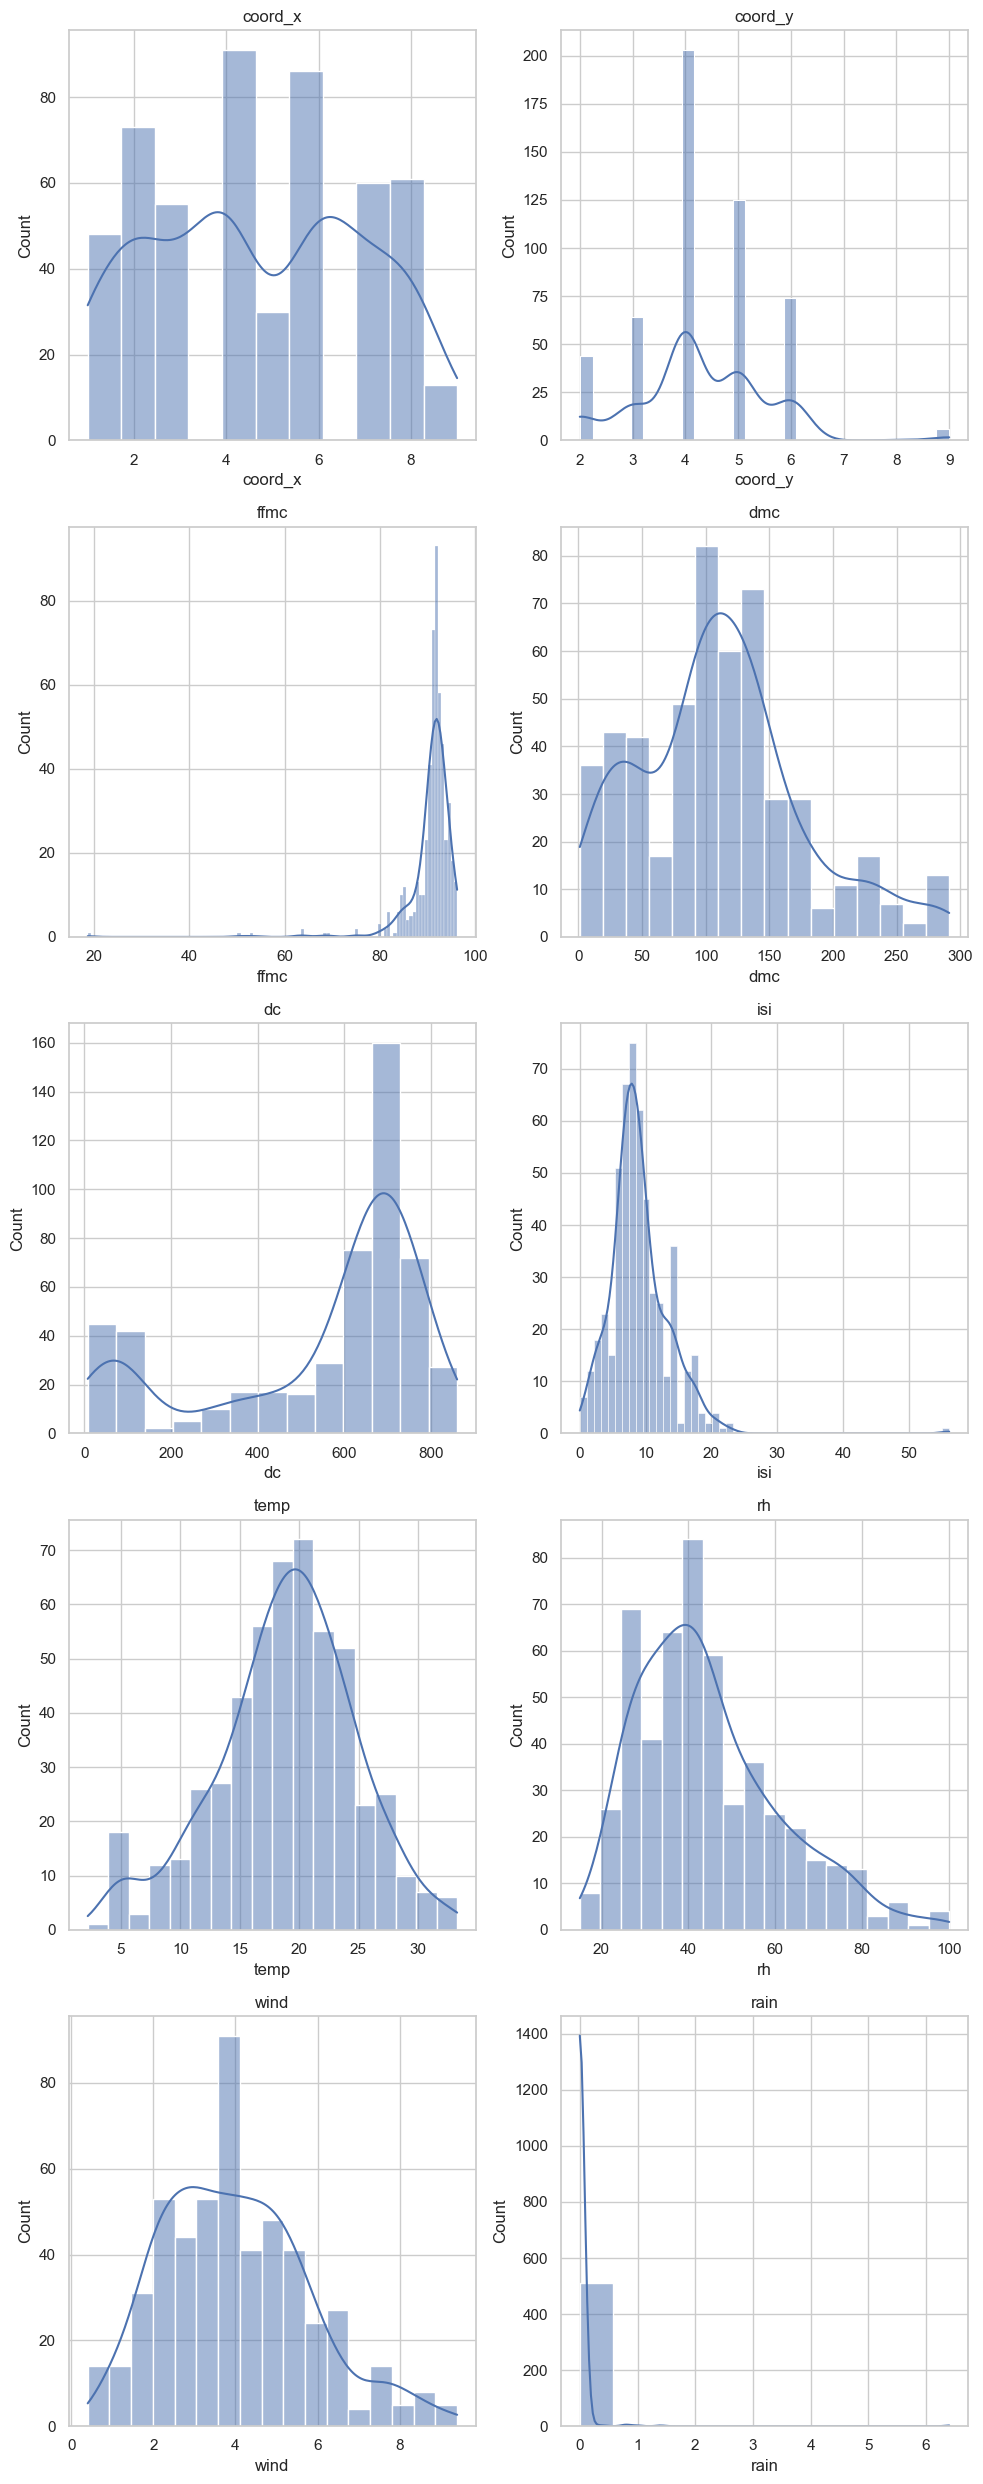

In [260]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Plot distributions of numerical features
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(10, 25))
count = 0
for col in num_cols:
    sns.histplot(X[col], kde=True, ax=axes[count//2, count%2])
    axes[count//2, count%2].set_title(col)
    count=count+1

plt.tight_layout()
plt.show()

In [261]:
num_cols_transform =  [ 'ffmc', 'isi','rh']

# Preprocessing

Create two [Column Transformers](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html), called preproc1 and preproc2, with the following guidelines:

- Numerical variables

    * (Preproc 1 and 2) Scaling: use a scaling method of your choice (Standard, Robust, Min-Max). 
    * Preproc 2 only: 
        
        + Choose a transformation for any of your input variables (or several of them). Evaluate if this transformation is convenient.
        + The choice of scaler is up to you.

- Categorical variables: 
    
    * (Preproc 1 and 2) Apply [one-hot encoding](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) where appropriate.


+ The only difference between preproc1 and preproc2 is the non-linear transformation of the numerical variables.
    


### Preproc 1

Create preproc1 below.

+ Numeric: scaled variables, no other transforms.
+ Categorical: one-hot encoding.

In [262]:
# preproc1

preproc1 = ColumnTransformer(
    [('standardizer', StandardScaler(),num_cols),
      ('OHE', OneHotEncoder(handle_unknown = 'infrequent_if_exist'),cat_cols)])
preproc1

ColumnTransformer(transformers=[('standardizer', StandardScaler(),
                                 ['coord_x', 'coord_y', 'ffmc', 'dmc', 'dc',
                                  'isi', 'temp', 'rh', 'wind', 'rain']),
                                ('OHE',
                                 OneHotEncoder(handle_unknown='infrequent_if_exist'),
                                 ['month', 'day'])])

### Preproc 2

Create preproc1 below.

+ Numeric: scaled variables, non-linear transformation to one or more variables.
+ Categorical: one-hot encoding.

In [263]:
# preproc2

preproc2 = ColumnTransformer(
    [('standardizer', StandardScaler(),num_cols),
     ('transform', PowerTransformer(method='yeo-johnson'),num_cols_transform),
     ('OHE', OneHotEncoder(handle_unknown = 'infrequent_if_exist'),cat_cols)])
preproc2

ColumnTransformer(transformers=[('standardizer', StandardScaler(),
                                 ['coord_x', 'coord_y', 'ffmc', 'dmc', 'dc',
                                  'isi', 'temp', 'rh', 'wind', 'rain']),
                                ('transform', PowerTransformer(),
                                 ['ffmc', 'isi', 'rh']),
                                ('OHE',
                                 OneHotEncoder(handle_unknown='infrequent_if_exist'),
                                 ['month', 'day'])])

## Model Pipeline


Create a [model pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html): 

+ Add a step labelled `preprocessing` and assign the Column Transformer from the previous section.
+ Add a step labelled `regressor` and assign a regression model to it. 

## Regressor

+ Use a regression model to perform a prediction. 

    - Choose a baseline regressor, tune it (if necessary) using grid search, and evaluate it using cross-validation.
    - Choose a more advance regressor, tune it (if necessary) using grid search, and evaluate it using cross-validation.
    - Both model choices are up to you, feel free to experiment.

In [264]:
# Pipeline A = preproc1 + baseline
pipeline_A = Pipeline([
    ('preprocess', preproc1),
    ('regressor', KNeighborsRegressor())
])
print(pipeline_A.get_params())


{'memory': None, 'steps': [('preprocess', ColumnTransformer(transformers=[('standardizer', StandardScaler(),
                                 ['coord_x', 'coord_y', 'ffmc', 'dmc', 'dc',
                                  'isi', 'temp', 'rh', 'wind', 'rain']),
                                ('OHE',
                                 OneHotEncoder(handle_unknown='infrequent_if_exist'),
                                 ['month', 'day'])])), ('regressor', KNeighborsRegressor())], 'verbose': False, 'preprocess': ColumnTransformer(transformers=[('standardizer', StandardScaler(),
                                 ['coord_x', 'coord_y', 'ffmc', 'dmc', 'dc',
                                  'isi', 'temp', 'rh', 'wind', 'rain']),
                                ('OHE',
                                 OneHotEncoder(handle_unknown='infrequent_if_exist'),
                                 ['month', 'day'])]), 'regressor': KNeighborsRegressor(), 'preprocess__n_jobs': None, 'preprocess__remainder': 'dr

In [265]:
# Pipeline B = preproc2 + baseline
pipeline_B = Pipeline([
    ('preprocess', preproc2),
    ('regressor', KNeighborsRegressor())
])

In [266]:
# Pipeline C = preproc1 + advanced model

pipeline_C = Pipeline([
    ('preprocess', preproc1),
    ('random_forest', RandomForestRegressor())
])
print(pipeline_C.get_params())

{'memory': None, 'steps': [('preprocess', ColumnTransformer(transformers=[('standardizer', StandardScaler(),
                                 ['coord_x', 'coord_y', 'ffmc', 'dmc', 'dc',
                                  'isi', 'temp', 'rh', 'wind', 'rain']),
                                ('OHE',
                                 OneHotEncoder(handle_unknown='infrequent_if_exist'),
                                 ['month', 'day'])])), ('regressor', RandomForestRegressor())], 'verbose': False, 'preprocess': ColumnTransformer(transformers=[('standardizer', StandardScaler(),
                                 ['coord_x', 'coord_y', 'ffmc', 'dmc', 'dc',
                                  'isi', 'temp', 'rh', 'wind', 'rain']),
                                ('OHE',
                                 OneHotEncoder(handle_unknown='infrequent_if_exist'),
                                 ['month', 'day'])]), 'regressor': RandomForestRegressor(), 'preprocess__n_jobs': None, 'preprocess__remainder':

In [267]:
# Pipeline D = preproc2 + advanced model
pipeline_D = Pipeline([
    ('preprocess', preproc2),
    ('random_forest', RandomForestRegressor())
])

# Tune Hyperparams

+ Perform GridSearch on each of the four pipelines. 
+ Tune at least one hyperparameter per pipeline.
+ Experiment with at least four value combinations per pipeline.

In [268]:
KNeighborsRegressor().get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [269]:
param_grid_A = [{'regressor__n_neighbors': [10,15,20,30], 'regressor__weights': ['uniform','distance'],'regressor__p':[1,2]}]

grid_cv_A = GridSearchCV(
    estimator= pipeline_A, 
    param_grid=param_grid_A, 
    scoring = 'neg_root_mean_squared_error', 
    cv = 5)
grid_cv_A.fit(X_train, Y_train)

res_A = grid_cv_A.cv_results_
res_A = pd.DataFrame(res_A)
print(grid_cv_A.best_score_)
print(grid_cv_A.best_params_)
print(grid_cv_A.best_estimator_)

-41.0408569278201
{'regressor__n_neighbors': 30, 'regressor__p': 2, 'regressor__weights': 'uniform'}
Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('standardizer',
                                                  StandardScaler(),
                                                  ['coord_x', 'coord_y', 'ffmc',
                                                   'dmc', 'dc', 'isi', 'temp',
                                                   'rh', 'wind', 'rain']),
                                                 ('OHE',
                                                  OneHotEncoder(handle_unknown='infrequent_if_exist'),
                                                  ['month', 'day'])])),
                ('regressor', KNeighborsRegressor(n_neighbors=30))])


In [270]:
param_grid_B = [{'regressor__n_neighbors': [10,15,20,30], 'regressor__weights': ['uniform','distance'],'regressor__p':[1,2]}]

grid_cv_B = GridSearchCV(
    estimator= pipeline_B, 
    param_grid=param_grid_B, 
    scoring = 'neg_root_mean_squared_error', 
    cv = 5)
grid_cv_B.fit(X_train, Y_train)

res_B = grid_cv_B.cv_results_
res_B = pd.DataFrame(res_B)
print(grid_cv_B.best_score_)
print(grid_cv_B.best_params_)
print(grid_cv_B.best_estimator_)

-41.36897395258448
{'regressor__n_neighbors': 30, 'regressor__p': 2, 'regressor__weights': 'uniform'}
Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('standardizer',
                                                  StandardScaler(),
                                                  ['coord_x', 'coord_y', 'ffmc',
                                                   'dmc', 'dc', 'isi', 'temp',
                                                   'rh', 'wind', 'rain']),
                                                 ('transform',
                                                  PowerTransformer(),
                                                  ['ffmc', 'isi', 'rh']),
                                                 ('OHE',
                                                  OneHotEncoder(handle_unknown='infrequent_if_exist'),
                                                  ['month', 'day'])])),
                ('regressor', KNeighborsRegressor(n_neighbo

In [271]:
param_grid_C = [{'regressor__min_samples_leaf' : [1, 2, 5],
'regressor__min_samples_split' : [2, 3, 4],
'regressor__max_depth': [5,7,10],
'regressor__n_estimators': [50,100,200]}]
grid_cv_C = GridSearchCV(
    estimator= pipeline_C, 
    param_grid=param_grid_C, 
    scoring = 'neg_root_mean_squared_error', 
    cv = 5)
grid_cv_C.fit(X_train, Y_train)

res_C = grid_cv_C.cv_results_
res_C = pd.DataFrame(res_C)
print(grid_cv_C.best_score_)
print(grid_cv_C.best_params_)
print(grid_cv_C.best_estimator_)

-42.903343416188235
{'regressor__max_depth': 10, 'regressor__min_samples_leaf': 5, 'regressor__min_samples_split': 3, 'regressor__n_estimators': 50}
Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('standardizer',
                                                  StandardScaler(),
                                                  ['coord_x', 'coord_y', 'ffmc',
                                                   'dmc', 'dc', 'isi', 'temp',
                                                   'rh', 'wind', 'rain']),
                                                 ('OHE',
                                                  OneHotEncoder(handle_unknown='infrequent_if_exist'),
                                                  ['month', 'day'])])),
                ('regressor',
                 RandomForestRegressor(max_depth=10, min_samples_leaf=5,
                                       min_samples_split=3, n_estimators=50))])


In [272]:
param_grid_D = [{'regressor__min_samples_leaf' : [1, 2, 5],
'regressor__min_samples_split' : [2, 3, 4],
'regressor__max_depth': [5,7,10],
'regressor__n_estimators': [50,100,200]}]
grid_cv_D = GridSearchCV(
    estimator= pipeline_D, 
    param_grid=param_grid_D, 
    scoring = 'neg_root_mean_squared_error', 
    cv = 5)
grid_cv_D.fit(X_train, Y_train)

res_D = grid_cv_C.cv_results_
res_D = pd.DataFrame(res_D)
print(grid_cv_D.best_score_)
print(grid_cv_D.best_params_)
print(grid_cv_D.best_estimator_)

-43.27134402577436
{'regressor__max_depth': 7, 'regressor__min_samples_leaf': 5, 'regressor__min_samples_split': 4, 'regressor__n_estimators': 100}
Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('standardizer',
                                                  StandardScaler(),
                                                  ['coord_x', 'coord_y', 'ffmc',
                                                   'dmc', 'dc', 'isi', 'temp',
                                                   'rh', 'wind', 'rain']),
                                                 ('transform',
                                                  PowerTransformer(),
                                                  ['ffmc', 'isi', 'rh']),
                                                 ('OHE',
                                                  OneHotEncoder(handle_unknown='infrequent_if_exist'),
                                                  ['month', 'day'])])),
             

# Evaluate

+ Which model has the best performance?

In [273]:
#from sklearn.metrics import root_mean_squared_error
#since my version of sklear does not support root_mean_squared_error I defined it by myself
import numpy as np
def RMSE (a,b):
    
    return np.sqrt(np.mean(np.square((a - b))))

In [274]:
best_A = grid_cv_A.best_estimator_
best_A.fit(X_train,Y_train)
rmse_A = RMSE(Y_test.to_numpy(), best_A.predict(X_test))
print(rmse_A)


89.43824739200062


In [275]:
best_B = grid_cv_B.best_estimator_
best_B.fit(X_train,Y_train)
rmse_B = RMSE(Y_test.to_numpy(), best_B.predict(X_test))
print(rmse_B)


89.35141043181841


In [276]:
best_C = grid_cv_C.best_estimator_
best_C.fit(X_train,Y_train)
rmse_C = RMSE(Y_test.to_numpy(), best_C.predict(X_test))
print(rmse_C)

88.911162728745


In [277]:
best_D = grid_cv_D.best_estimator_
best_D.fit(X_train,Y_train)
rmse_D = RMSE(Y_test.to_numpy(), best_D.predict(X_test))
print(rmse_D)

89.2293889367886


Since data is highly imbalanced we can calculate the RMSE for the predictor, which will always predict 0

In [278]:
RMSE(Y_test.to_numpy(),np.zeros(len(Y_test)))

90.45502403801542

My best predictor due to test evaluation is predictor C with the resulting RMSE = 88.91
It is only slightly better than RMSE of all other models including predictor, which always predicts 0, so overall models need improvement to be considered as good ones. 

# Export

+ Save the best performing model to a pickle file.

In [279]:
import pickle

pickle.dump(best_C, open("best_model.pkl", "wb"))

# Explain

+ Use SHAP values to explain the following only for the best-performing model:

    - Select an observation in your test set and explain which are the most important features that explain that observation's specific prediction.

    - In general, across the complete training set, which features are the most and least important.

+ If you were to remove features from the model, which ones would you remove? Why? How would you test that these features are actually enhancing model performance?

TEST SET, individual observation

In [286]:
import shap
data_transform = best_C.named_steps['preprocess'].transform(X_test)

explainer = shap.TreeExplainer(
    best_C.named_steps['random_forest'], 
    data_transform,
    feature_names = best_C.named_steps['preprocess'].get_feature_names_out())

shap_values = explainer(data_transform,check_additivity= False)


In [293]:
best_C.named_steps['preprocess'].get_feature_names_out()

array(['standardizer__coord_x', 'standardizer__coord_y',
       'standardizer__ffmc', 'standardizer__dmc', 'standardizer__dc',
       'standardizer__isi', 'standardizer__temp', 'standardizer__rh',
       'standardizer__wind', 'standardizer__rain', 'OHE__month_apr',
       'OHE__month_aug', 'OHE__month_dec', 'OHE__month_feb',
       'OHE__month_jan', 'OHE__month_jul', 'OHE__month_jun',
       'OHE__month_mar', 'OHE__month_may', 'OHE__month_nov',
       'OHE__month_oct', 'OHE__month_sep', 'OHE__day_fri', 'OHE__day_mon',
       'OHE__day_sat', 'OHE__day_sun', 'OHE__day_thu', 'OHE__day_tue',
       'OHE__day_wed'], dtype=object)

In [296]:
shap_values[1].values

array([ 0.43622031, -0.91723961, -0.79957098,  1.66425451, -2.44098294,
        0.17555827, -4.22468074,  0.86608543, -0.03801346,  0.        ,
        0.        , -0.31130612,  0.        , -0.01575556,  0.        ,
       -0.52838058,  0.        , -0.01993736,  0.        ,  0.        ,
        0.        , -0.85693828, -0.11279106, -0.2188641 , -0.96050606,
       -0.05884368, -0.02572367,  0.36453597, -0.08107316])

In [302]:
lst = []
for i in range(len(shap_values[1])):
    lst.append([best_C.named_steps['preprocess'].get_feature_names_out()[i],shap_values[1].values[i]])
lst = sorted(lst,key=lambda x: np.abs(x[1]),reverse = True)  

for i in range(len(lst)):
    print(lst[i])

['standardizer__temp', -4.224680743467179]
['standardizer__dc', -2.4409829434231507]
['standardizer__dmc', 1.6642545110780338]
['OHE__day_sat', -0.9605060602290905]
['standardizer__coord_y', -0.9172396075038705]
['standardizer__rh', 0.8660854293038573]
['OHE__month_sep', -0.856938277008012]
['standardizer__ffmc', -0.7995709804368744]
['OHE__month_jul', -0.5283805828914047]
['standardizer__coord_x', 0.436220314327511]
['OHE__day_tue', 0.3645359694655053]
['OHE__month_aug', -0.3113061168955755]
['OHE__day_mon', -0.21886409808765164]
['standardizer__isi', 0.17555827340795077]
['OHE__day_fri', -0.11279106276459061]
['OHE__day_wed', -0.08107316335663199]
['OHE__day_sun', -0.058843679666752]
['standardizer__wind', -0.03801345809493796]
['OHE__day_thu', -0.025723668513819575]
['OHE__month_mar', -0.019937362561468035]
['OHE__month_feb', -0.01575555756688118]
['standardizer__rain', 0.0]
['OHE__month_apr', 0.0]
['OHE__month_dec', 0.0]
['OHE__month_jan', 0.0]
['OHE__month_jun', 0.0]
['OHE__month_

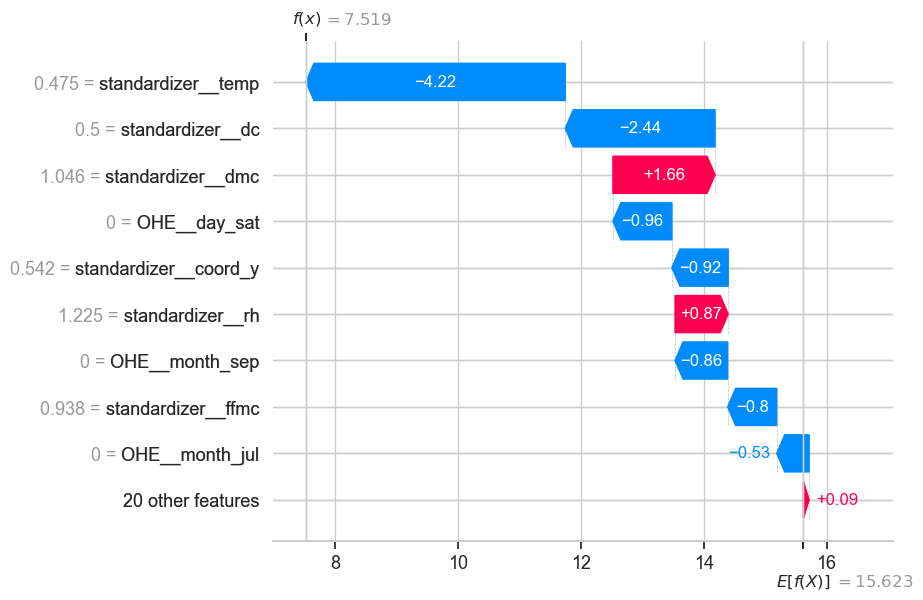

In [287]:
shap.plots.waterfall(shap_values[1])

TRAINING SET, overal observation

In [304]:
data_transform = best_C.named_steps['preprocess'].transform(X_train)

explainer = shap.TreeExplainer(
    best_C.named_steps['random_forest'], 
    data_transform,
    feature_names = best_C.named_steps['preprocess'].get_feature_names_out())

shap_values = explainer(data_transform,check_additivity= False)

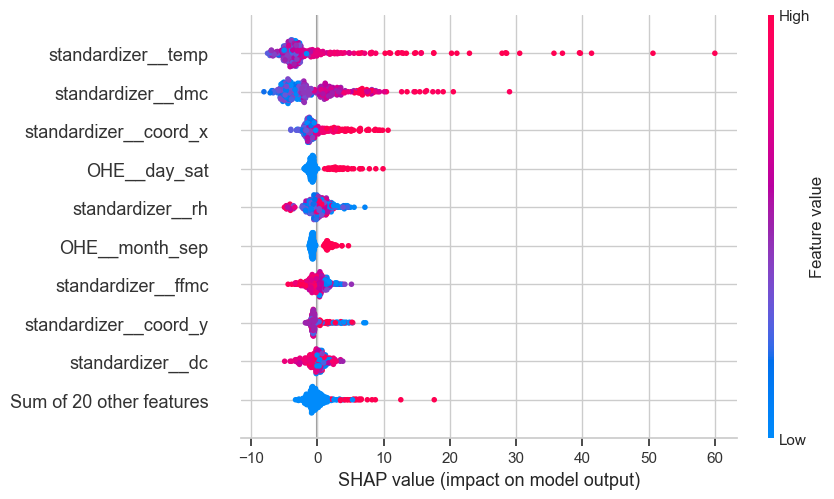

In [305]:
shap.plots.beeswarm(shap_values)

In [321]:
feature_names = shap_values.feature_names
shap_df = pd.DataFrame(shap_values.values, columns=feature_names)
vals = np.abs(shap_df.values).mean(0)
shap_importance = pd.DataFrame(list(zip(feature_names, vals)), columns=['col_name', 'feature_importance_vals'])
shap_importance.sort_values(by=['feature_importance_vals'], ascending=False, inplace=True)


In [322]:
shap_importance

,col_name,feature_importance_vals
6,standardizer__temp,5.152626
3,standardizer__dmc,4.020860
0,standardizer__coord_x,1.768885
24,OHE__day_sat,1.324560
7,standardizer__rh,1.315401
21,OHE__month_sep,1.112077
2,standardizer__ffmc,1.053411
1,standardizer__coord_y,0.971965
4,standardizer__dc,0.936911
15,OHE__month_jul,0.700849




+ Select an observation in your test set and explain which are the most important features that explain that observation's specific prediction.

     The most important features for single observation from the test set are:
     - temperature
     - dc index
     - dmc index

+ In general, across the complete training set, which features are the most and least important?

    The most important features are:
     - temperature
     - dmc
     - coord_x
    
    The least important features are:
     - a bunch of OHE-months and OHE-days
     - rain
     - wind
     - isi index


+ If you were to remove features from the model, which ones would you remove? Why? How would you test that these features are actually enhancing model performance?

I would remove rain, wind and isi index as the least important features. I would also consider investigating months influence because I believe there should be a high correlation between months and temperatures; months probably do not provide much new information to the model. Weekdays also show interesting results: cause Saturdays have a strong influence on the target value. I would assume that this feature captures human-caused fires and maybe it will be a good idea to substitute 7 weekdays with binary value weekends(Sat, Sun) as 1 and weekdays(Mon-Fri) as 0.

To test I would go with two ways: train the model without those features and compare the results or perform null-hypothesis analysis and train a simple linear regression, check the p-values and then make a decision. 

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-3`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_3.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/production/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.

# Reference

Cortez,Paulo and Morais,Anbal. (2008). Forest Fires. UCI Machine Learning Repository. https://doi.org/10.24432/C5D88D.